<h1>Project: Wrangle and Analyse data</h1>

In [178]:
import pandas as pd
import tweepy
import json
import matplotlib.pyplot as plt
from matplotlib import cm
import requests
import numpy as np
import seaborn as sns
%matplotlib inline

<h2>Gather Data</h2>

In [3]:
twitter_archive_df = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
image_predictions_df = pd.read_csv("image-predictions.tsv", delimiter='\t')

In [5]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
error_ids = []
with open("additional_tweets_data.txt", 'w') as tweets_file:
    for each_id in twitter_archive_df['tweet_id']:
        try:
            tweet = api.get_status(each_id)
            json.dump(tweet._json, tweets_file)
            tweets_file.write("\n")
        except:
            error_ids.append(each_id)
            print("Error in fetching the tweet: {}".format(each_id))

Error in fetching the tweet: 888202515573088257
Error in fetching the tweet: 873697596434513921
Error in fetching the tweet: 872668790621863937
Error in fetching the tweet: 872261713294495745
Error in fetching the tweet: 869988702071779329
Error in fetching the tweet: 866816280283807744
Error in fetching the tweet: 861769973181624320
Error in fetching the tweet: 856602993587888130
Error in fetching the tweet: 851953902622658560
Error in fetching the tweet: 845459076796616705
Error in fetching the tweet: 844704788403113984
Error in fetching the tweet: 842892208864923648
Error in fetching the tweet: 837366284874571778
Error in fetching the tweet: 837012587749474308
Error in fetching the tweet: 829374341691346946
Error in fetching the tweet: 827228250799742977
Error in fetching the tweet: 812747805718642688
Error in fetching the tweet: 802247111496568832
Error in fetching the tweet: 775096608509886464
Error in fetching the tweet: 770743923962707968


Rate limit reached. Sleeping for: 424


Error in fetching the tweet: 754011816964026368
Error in fetching the tweet: 680055455951884288


Rate limit reached. Sleeping for: 350


In [10]:
tweet_api_data = []

with open('additional_tweets_data.txt', 'r') as additional_json:
    # read the first line to start the loop
    line = additional_json.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_api_data.append(json_data)

        # read the next line of JSON data
        line = additional_json.readline()

# convert the tweet JSON data dictionary list to a DataFrame
additional_data_df = pd.DataFrame(tweet_api_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

In [11]:
additional_data_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8034,37364
1,892177421306343426,5963,32111
2,891815181378084864,3946,24216
3,891689557279858688,8190,40657
4,891327558926688256,8882,38879


In [12]:
additional_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null int64
retweet_count     2334 non-null int64
favorite_count    2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [13]:
additional_data_df.to_csv("twitter_api_data.csv",index=False)

<h2> Assess Data</h2>

In [14]:
twitter_archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
twitter_archive_df.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [16]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
# total missing values for each features
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [25]:
sum(twitter_archive_df.duplicated())

0

In [26]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
image_predictions_df.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [28]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
image_predictions_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
teddy                         18
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [31]:
additional_data_df.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8034,37364
1,892177421306343426,5963,32111
2,891815181378084864,3946,24216
3,891689557279858688,8190,40657
4,891327558926688256,8882,38879
5,891087950875897856,2954,19552
6,890971913173991426,1951,11412
7,890729181411237888,17913,62977
8,890609185150312448,4055,26885
9,890240255349198849,6987,30813


In [32]:
additional_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null int64
retweet_count     2334 non-null int64
favorite_count    2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [33]:
sum(additional_data_df.duplicated())

0

In [35]:
additional_data_df.sort_values(['favorite_count'], ascending= 0)[0:5]

,tweet_id,retweet_count,favorite_count
1018,744234799360020481,81139,161326
397,822872901745569793,45945,137522
517,807106840509214720,59165,124640
129,866450705531457537,34334,119875
1058,739238157791694849,60127,119195


<h3>Issues identified</h3>

**Quality Issues:**<br>
1. The rating_denominator should have a standard throughout to be 10. There are various other values, which is erroneous.
2. The rating_numerator has manu erronous values, like in 100s.
3. the datatype of timestamp should be datetime and not string.
4. The are wrong dog names mentioned like 'a', 'an'.
5. The names of the dogs a are inconsistent. All names to start with capital letters.
6. Columns like 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'in_reply_to_user_id' have lot of missing values. The columns are not useful in the analysis and can be dropped.
7. The 'expanded_url' column has a few missing values. This suggests that there are no images in the tweets. These tweets cannot be considered for analysis.
8. There are urls in the text which is not readable for user. This needs to be reduced to text only.
9. The columns names like p1,p2 are not clear Image predictions.

<br>

**Tidiness Issues**<br>
1. The favorite_count and retweet_count need to belong to the same dataframe.
2. Columns 'doggo', 'floofer', 'pupper', 'puppo' in twitter_archive_df should belong to one colomn, maybe dog_stage.


<h2>Data Cleaning</h2>

In [65]:
#Lets keep copes of the dataframe
twitter_archive_cleaned = twitter_archive_df.copy()
image_predictions_cleaned = image_predictions_df.copy()

In [136]:
tweet_data_cleaned = additional_data_df.copy()

**Quality 1: The rating_denominator should have a standard throughout to be 10. There are various other values, which is erroneous**

In [80]:
faulty_denominator = twitter_archive_cleaned.query("rating_denominator != 10")

In [81]:
pd.set_option('display.max_colwidth', -1)
faulty_denominator[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [78]:
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 775096608509886464, ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 740373189193256964, ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 722974582966214656, ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 716439118184652801, ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 682962037429899265, ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 666287406224695296, ['rating_denominator']] = 10

In [82]:
len(twitter_archive_cleaned.query("rating_denominator != 10")['tweet_id'])

17

**Quality 2: The rating_numerator has manu erronous values, like in 100s.**

In [83]:
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 775096608509886464, ['rating_numerator']] = 14
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 740373189193256964, ['rating_numerator']] = 14
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 722974582966214656, ['rating_numerator']] = 13
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 716439118184652801, ['rating_numerator']] = 11
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 682962037429899265, ['rating_numerator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned.tweet_id == 666287406224695296, ['rating_numerator']] = 9

In [87]:
faulty_numerator = twitter_archive_cleaned.query("rating_numerator > 15")

In [86]:
len(faulty_numerator)

25

In [88]:
faulty_numerator[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


**Quality 3: The datatype of timestamp should be datetime and not string.**

In [89]:
twitter_archive_cleaned['timestamp'] = pd.to_datetime(twitter_archive_cleaned['timestamp'])

In [90]:
twitter_archive_cleaned.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

**Quality 4: The are wrong dog names mentioned like 'a', 'an'.**

In [93]:
twitter_archive_cleaned.name.value_counts()

None         815
Charlie      12 
Oliver       11 
Cooper       11 
Lucy         11 
Tucker       10 
Lola         10 
Penny        10 
Bo           9  
Winston      9  
Sadie        8  
Bailey       7  
Toby         7  
Daisy        7  
Buddy        7  
Jax          6  
Bella        6  
Scout        6  
Stanley      6  
Rusty        6  
Milo         6  
Koda         6  
Dave         6  
Leo          6  
Jack         6  
Oscar        6  
Sammy        5  
Finn         5  
Bentley      5  
Larry        5  
            ..  
Brutus       1  
Henry        1  
Dook         1  
Derby        1  
Marty        1  
Pawnd        1  
Skye         1  
Tassy        1  
Charl        1  
Leonard      1  
Bauer        1  
Tedrick      1  
Timmy        1  
Leonidas     1  
Hall         1  
Mosby        1  
Edgar        1  
Alfy         1  
Jerome       1  
DayZ         1  
Kane         1  
Bobb         1  
Jebberson    1  
Jim          1  
Cannon       1  
Swagger      1  
Randall      1  
Reagan       1

In [92]:
twitter_archive_cleaned.name.replace(['a','the','an'], 'None', inplace=True)

**Quality 5: The names of the dogs a are inconsistent. All names to start with capital letters.**

In [98]:
twitter_archive_cleaned.name.str.islower().sum()

0

In [97]:
twitter_archive_cleaned.name = twitter_archive_cleaned.name.str.capitalize()

In [99]:
twitter_archive_cleaned.name.str.islower().sum()

0

**Quality 6: Columns like 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'in_reply_to_user_id' have lot of missing values. The columns are not useful in the analysis and can be dropped.**

In [100]:
list_of_coulumns_being_dropped = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                  'in_reply_to_status_id','in_reply_to_user_id', 'in_reply_to_user_id']

In [101]:
twitter_archive_cleaned.drop(list_of_coulumns_being_dropped, axis = 1, inplace = True)
twitter_archive_cleaned.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


**Quality7: The 'expanded_url' column has a few missing values. This suggests that there are no images in the tweets. These tweets cannot be considered for analysis.**

In [102]:
twitter_archive_cleaned = twitter_archive_cleaned.dropna(subset = ['expanded_urls'])

In [104]:
twitter_archive_cleaned.shape

(2297, 12)

In [106]:

twitter_archive_cleaned.expanded_urls.isnull().sum()

0

**Quality 8 : There are urls in the 'source' which is not readable for user. This needs to be reduced to text only.**

In [114]:
twitter_archive_cleaned.source.value_counts()

Twitter for iPhone     2163
Vine - Make a Scene    91  
Twitter Web Client     32  
TweetDeck              11  
Name: source, dtype: int64

In [110]:
values_to_replace = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                     '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                     '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

new_values = ['Twitter for iPhone','Vine - Make a Scene','Twitter Web Client','TweetDeck']

In [111]:
twitter_archive_cleaned.replace(values_to_replace, new_values, inplace=True)

In [113]:
twitter_archive_cleaned.source.value_counts()

Twitter for iPhone     2163
Vine - Make a Scene    91  
Twitter Web Client     32  
TweetDeck              11  
Name: source, dtype: int64

**Quality 9: The columns names like p1,p2 are not clear Image predictions.**

In [115]:
image_predictions_cleaned.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [116]:

# change the column names
image_predictions_cleaned.rename(columns={'p1':'prediction_1', 'p1_conf': 'first_confidence', 'p1_dog': 'dog_breed_1',
                                  'p2': 'prediction_2', 'p2_conf': 'second_confidence', 'p2_dog': 'dog_breed_2',
                                  'p3': 'prediction_3', 'p3_conf': 'third_confidence', 'p3_dog': 'dog_breed_3'},
                                 inplace = True)

In [117]:
image_predictions_cleaned.head()

,tweet_id,jpg_url,img_num,prediction_1,first_confidence,dog_breed_1,prediction_2,second_confidence,dog_breed_2,prediction_3,third_confidence,dog_breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<h3>Resolving Tidiness Issues</h3>

**Tidiness Issues 1 : The favorite_count and retweet_count need to belong to the same dataframe.**

In [128]:
twitter_archive_cleaned.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,,,,,
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,,,,,
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,,,,,
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,,,,,
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,,,,,
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,,,,doggo


In [123]:
stages = ['puppo','pupper', 'doggo', 'floofer']
for each in stages:
    twitter_archive_cleaned[each] = twitter_archive_cleaned[each].replace('None', '')

In [129]:
twitter_archive_cleaned['dog_stage'] = twitter_archive_cleaned.pupper + twitter_archive_cleaned.puppo + twitter_archive_cleaned.floofer + twitter_archive_cleaned.doggo

In [131]:
twitter_archive_cleaned.dog_stage.head(20)

0          
1          
2          
3          
4          
5          
6          
7          
8          
9     doggo
10         
11         
12    puppo
13         
14    puppo
15         
16         
17         
18         
19         
Name: dog_stage, dtype: object

In [132]:
twitter_archive_cleaned.drop(columns=['puppo','pupper', 'doggo', 'floofer'], inplace=True)

In [134]:
twitter_archive_cleaned.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo


**Tidiness Issue 2: The favorite_count and retweet_count need to belong to the same dataframe.**

In [137]:
tweet_data_cleaned.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8034,37364
1,892177421306343426,5963,32111
2,891815181378084864,3946,24216
3,891689557279858688,8190,40657
4,891327558926688256,8882,38879


In [139]:
twitter_archive_cleaned.shape

(2297, 9)

In [140]:
tweet_data_cleaned.shape

(2334, 3)

In [141]:
twitter_archive_cleaned = pd.merge(twitter_archive_cleaned, tweet_data_cleaned, on='tweet_id', how = 'inner')

In [142]:
twitter_archive_cleaned.shape

(2275, 11)

In [143]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 2274
Data columns (total 11 columns):
tweet_id              2275 non-null int64
timestamp             2275 non-null datetime64[ns]
source                2275 non-null object
text                  2275 non-null object
expanded_urls         2275 non-null object
rating_numerator      2275 non-null int64
rating_denominator    2275 non-null int64
name                  2275 non-null object
dog_stage             2275 non-null object
retweet_count         2275 non-null int64
favorite_count        2275 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 213.3+ KB


In [144]:
twitter_archive_cleaned.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,8034,37364
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,5963,32111
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,,3946,24216
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,,8190,40657
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,,8882,38879


In [145]:
twitter_archive_cleaned.to_csv('twitter_archive_updated.csv', encoding='utf-8')

<h2>Data Analysis and Visualization</h2>

**Distribution of Numerator across scale:**

In [161]:
# subset dataframe to obtain rows that have ratings 15 and below
df_numerator = twitter_archive_cleaned[(twitter_archive_cleaned.rating_numerator <= 15)]
                           
numerator_values = df_numerator.groupby(['rating_numerator']).count()['tweet_id']

In [162]:
numerator_values

rating_numerator
0     2  
1     5  
2     9  
3     19 
4     15 
5     35 
6     32 
7     52 
8     102
9     155
10    454
11    456
12    543
13    328
14    48 
15    1  
Name: tweet_id, dtype: int64

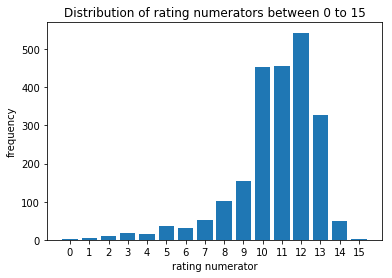

In [163]:
# plot the bar charts for distribution of rating numerators between 0 to 14
plt.bar(np.arange(16), numerator_values)
plt.xticks(np.arange(16))
plt.xlabel('rating numerator')
plt.ylabel('frequency')
plt.title('Distribution of rating numerators between 0 to 15');

**Distribution of Dog stages**

Text(0.5, 1.0, 'The Distribution of Dog Stages')

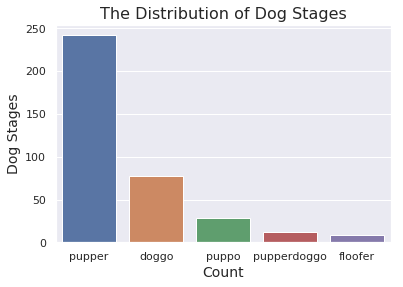

In [177]:
sorted_stage = twitter_archive_cleaned.query("dog_stage != ''")['dog_stage'].value_counts().head().index
sns.set(style="darkgrid")
sns.countplot(data = twitter_archive_cleaned, x = 'dog_stage', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stages', fontsize=14)
plt.title('The Distribution of Dog Stages',fontsize=16)

In [189]:
ratings_df = twitter_archive_cleaned.query("rating_numerator < 15 and favorite_count!=0 and retweet_count!= 0")

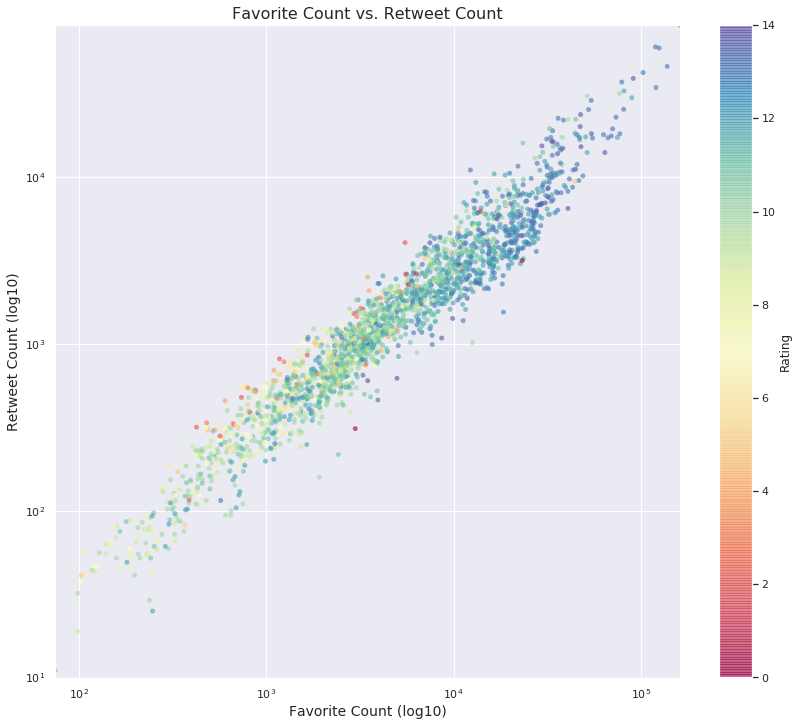

In [206]:
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 12))

plt.xscale('log')
plt.yscale('log')
plt.xlim(ratings_df['favorite_count'].min() , ratings_df['favorite_count'].max())
plt.ylim(10, ratings_df['retweet_count'].max())

colours = ratings_df['rating_numerator']
markers = 25

plt.scatter(ratings_df['favorite_count'], ratings_df['retweet_count'], 
             c=colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.6)

# title and labels
plt.title('Favorite Count vs. Retweet Count', fontsize = 16)
plt.xlabel('Favorite Count (log10)', fontsize = 14)
plt.ylabel('Retweet Count (log10)', fontsize = 14)

# colour bar
cbar = plt.colorbar()
cbar.set_label('Rating')

plt.show();

In [195]:
good_dogs_meme_date = pd.to_datetime('2016-9-12')

<Figure size 720x576 with 0 Axes>

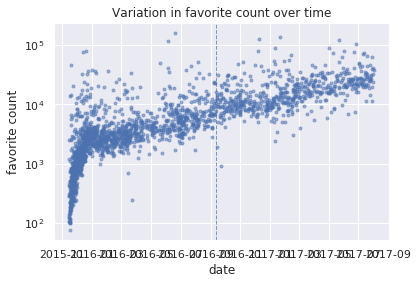

In [204]:
plt.figure(figsize=(10,8))
fig, ax = plt.subplots()

ax.plot_date(ratings_df.timestamp, ratings_df.favorite_count, alpha=0.5, ms=3)
# log transform the scale
ax.set_yscale('log')
plt.xlabel('date')
plt.ylabel('favorite count')
plt.title('Variation in favorite count over time')
plt.axvline(good_dogs_meme_date, lw=1, ls='dashed', alpha=0.7);
